# Pandas Tutorial (Draft)

Pandas introduces dataframes dor Python. Dataframes are like spreadsheets. Data is organized in columns and rows. Column IDs are the column headers or column names, row IDs are either the position of the row (numerical row index) or a column defined to be the index.

Pandas is often used to store time series, e.g. yearly average temperature at different measurement stations. In this case it is very convenient to make a column with time information (timestamp, date, year, etc.) the row index.

A column can be retrieved by its columns name, e.g. `ser = temperature["Duisburg"]`. In this case the type of the result variable `ser` would be _series_. A series contains the data plus the index column, e.g. the time. The series is self-contained, the user does not have to think about the associated time sequeunce, it is integral part of the series. 

## Some Tutorials
 
1. [Intro to Data Structures](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html)
1. [10 Minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
1. [NumPy Quickstart](https://numpy.org/devdocs/user/quickstart.html)


* https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
* https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html
* https://bitbucket.org/hrojas/learn-pandas/src/master/
* https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/
* https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
* https://www.kaggle.com/learn/pandas


## Create a Pandas Time Series

In [1]:
import pandas as pd
import numpy as np

In [2]:
# You can create a series from a dict
d = {"a": 2, "b": 6, "c": 7}
print(d)

{'a': 2, 'b': 6, 'c': 7}


In [3]:
ser = pd.Series(d)
ser

a    2
b    6
c    7
dtype: int64

In [4]:
dates = pd.date_range('20200701', periods=6)

In [5]:
dates

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05', '2020-07-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
# Temperature values
temp1 = np.array([20.1, 21.2, 23.4, 24.1, 25., 24.5])

print(type(temp1))
print(temp1)

<class 'numpy.ndarray'>
[20.1 21.2 23.4 24.1 25.  24.5]


In [7]:
# Calculation and broadcasting
print(temp1-10)

[10.1 11.2 13.4 14.1 15.  14.5]


In [8]:
s1 = pd.Series(temp1, index=dates)
print(type(s1))
print(s1)

<class 'pandas.core.series.Series'>
2020-07-01    20.1
2020-07-02    21.2
2020-07-03    23.4
2020-07-04    24.1
2020-07-05    25.0
2020-07-06    24.5
Freq: D, dtype: float64


In [9]:
s1.head()

2020-07-01    20.1
2020-07-02    21.2
2020-07-03    23.4
2020-07-04    24.1
2020-07-05    25.0
Freq: D, dtype: float64

In [10]:
# Series behave like dicts
s1["2020-07-03"]

23.4

In [11]:
# Series behave like ndarrays
print(s1+15)

2020-07-01    35.1
2020-07-02    36.2
2020-07-03    38.4
2020-07-04    39.1
2020-07-05    40.0
2020-07-06    39.5
Freq: D, dtype: float64


In [12]:
# Series are index aligned with operations
print(s1[1:])
print(s1[:-1])

2020-07-02    21.2
2020-07-03    23.4
2020-07-04    24.1
2020-07-05    25.0
2020-07-06    24.5
Freq: D, dtype: float64
2020-07-01    20.1
2020-07-02    21.2
2020-07-03    23.4
2020-07-04    24.1
2020-07-05    25.0
Freq: D, dtype: float64


In [13]:
print(s1[1:] - s1[:-1])

2020-07-01    NaN
2020-07-02    0.0
2020-07-03    0.0
2020-07-04    0.0
2020-07-05    0.0
2020-07-06    NaN
Freq: D, dtype: float64


In [14]:
# Attention! with s2=s1 s2 is just a reverence to s1! If you change s2 you change s1.

s2 = s1 # A REFERENCE
# s1 = s1 + 0 # NOT A REFERENCE

s2["2020-07-03"] = 50
print("Series s1 after modification of s2:")
print(s1)

Series s1 after modification of s2:
2020-07-01    20.1
2020-07-02    21.2
2020-07-03    50.0
2020-07-04    24.1
2020-07-05    25.0
2020-07-06    24.5
Freq: D, dtype: float64


In [15]:
s1["2020-07-03"] = 23.4
s1

2020-07-01    20.1
2020-07-02    21.2
2020-07-03    23.4
2020-07-04    24.1
2020-07-05    25.0
2020-07-06    24.5
Freq: D, dtype: float64

In [16]:
# Deep copy
s2 = s1.copy()
s2["2020-07-03"] = 50
print("s1:")
print(s1)
print("s2:")
print(s2)

s1:
2020-07-01    20.1
2020-07-02    21.2
2020-07-03    23.4
2020-07-04    24.1
2020-07-05    25.0
2020-07-06    24.5
Freq: D, dtype: float64
s2:
2020-07-01    20.1
2020-07-02    21.2
2020-07-03    50.0
2020-07-04    24.1
2020-07-05    25.0
2020-07-06    24.5
Freq: D, dtype: float64


In [17]:
dates2 = dates + pd.Timedelta('1 day')

In [18]:
s2.index = dates2
print(s2)

2020-07-02    20.1
2020-07-03    21.2
2020-07-04    50.0
2020-07-05    24.1
2020-07-06    25.0
2020-07-07    24.5
Freq: D, dtype: float64


In [19]:
print(s2-s1)

2020-07-01     NaN
2020-07-02    -1.1
2020-07-03    -2.2
2020-07-04    25.9
2020-07-05    -0.9
2020-07-06     0.5
2020-07-07     NaN
Freq: D, dtype: float64


In [20]:
s3 = s1 + np.random.randn(6)
dates3 = dates + pd.Timedelta('2 day')
s3.index = dates3
print(s3)

2020-07-03    21.850047
2020-07-04    20.654171
2020-07-05    22.717380
2020-07-06    23.573947
2020-07-07    25.497480
2020-07-08    23.666144
Freq: D, dtype: float64


In [21]:
s1 - s3

2020-07-01         NaN
2020-07-02         NaN
2020-07-03    1.549953
2020-07-04    3.445829
2020-07-05    2.282620
2020-07-06    0.926053
2020-07-07         NaN
2020-07-08         NaN
Freq: D, dtype: float64

In [22]:
s1.rename("001")

2020-07-01    20.1
2020-07-02    21.2
2020-07-03    23.4
2020-07-04    24.1
2020-07-05    25.0
2020-07-06    24.5
Freq: D, Name: 001, dtype: float64

In [23]:
s1

2020-07-01    20.1
2020-07-02    21.2
2020-07-03    23.4
2020-07-04    24.1
2020-07-05    25.0
2020-07-06    24.5
Freq: D, dtype: float64

In [24]:
help(s1.rename)

Help on method rename in module pandas.core.series:

rename(index=None, *, axis=None, copy=True, inplace=False, level=None, errors='ignore') method of pandas.core.series.Series instance
    Alter Series index labels or name.
    
    Function / dict values must be unique (1-to-1). Labels not contained in
    a dict / Series will be left as-is. Extra labels listed don't throw an
    error.
    
    Alternatively, change ``Series.name`` with a scalar value.
    
    See the :ref:`user guide <basics.rename>` for more.
    
    Parameters
    ----------
    axis : {0 or "index"}
        Unused. Accepted for compatability with DataFrame method only.
    index : scalar, hashable sequence, dict-like or function, optional
        Functions or dict-like are transformations to apply to
        the index.
        Scalar or hashable sequence-like will alter the ``Series.name``
        attribute.
    
    **kwargs
        Additional keyword arguments passed to the function. Only the
        "inplac

In [25]:
s1.rename("S001", inplace = True)
s2.rename("S002", inplace = True)
s3.rename("S003", inplace = True)

2020-07-03    21.850047
2020-07-04    20.654171
2020-07-05    22.717380
2020-07-06    23.573947
2020-07-07    25.497480
2020-07-08    23.666144
Freq: D, Name: S003, dtype: float64

## Create Data Frame from Series

https://stackoverflow.com/questions/13653030/how-do-i-pass-a-list-of-series-to-a-pandas-dataframe

It is easy to convert a series into a dataframe. The column names are taken from the series names by default.

In [26]:
df1 = pd.DataFrame(s1)
df1

,S001
2020-07-01,20.1
2020-07-02,21.2
2020-07-03,23.4
2020-07-04,24.1
2020-07-05,25.0
2020-07-06,24.5


In [27]:
df2 = pd.DataFrame(s2)

In [28]:
# axis = 1: concatenation with row index alignment.
df = pd.concat([df1,df2],axis = 1)
df

,S001,S002
2020-07-01,20.1,NaN
2020-07-02,21.2,20.1
2020-07-03,23.4,21.2
2020-07-04,24.1,50.0
2020-07-05,25.0,24.1
2020-07-06,24.5,25.0
2020-07-07,NaN,24.5


### From a dict of series

In [29]:
d = {s1.name: s1,s2.name: s2,s3.name: s3}
d

{'S001': 2020-07-01    20.1
 2020-07-02    21.2
 2020-07-03    23.4
 2020-07-04    24.1
 2020-07-05    25.0
 2020-07-06    24.5
 Freq: D, Name: S001, dtype: float64,
 'S002': 2020-07-02    20.1
 2020-07-03    21.2
 2020-07-04    50.0
 2020-07-05    24.1
 2020-07-06    25.0
 2020-07-07    24.5
 Freq: D, Name: S002, dtype: float64,
 'S003': 2020-07-03    21.850047
 2020-07-04    20.654171
 2020-07-05    22.717380
 2020-07-06    23.573947
 2020-07-07    25.497480
 2020-07-08    23.666144
 Freq: D, Name: S003, dtype: float64}

In [30]:
df = pd.DataFrame(d)

In [31]:
df

,S001,S002,S003
2020-07-01,20.1,NaN,NaN
2020-07-02,21.2,20.1,NaN
2020-07-03,23.4,21.2,21.850047
2020-07-04,24.1,50.0,20.654171
2020-07-05,25.0,24.1,22.717380
2020-07-06,24.5,25.0,23.573947
2020-07-07,NaN,24.5,25.497480
2020-07-08,NaN,NaN,23.666144


In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt

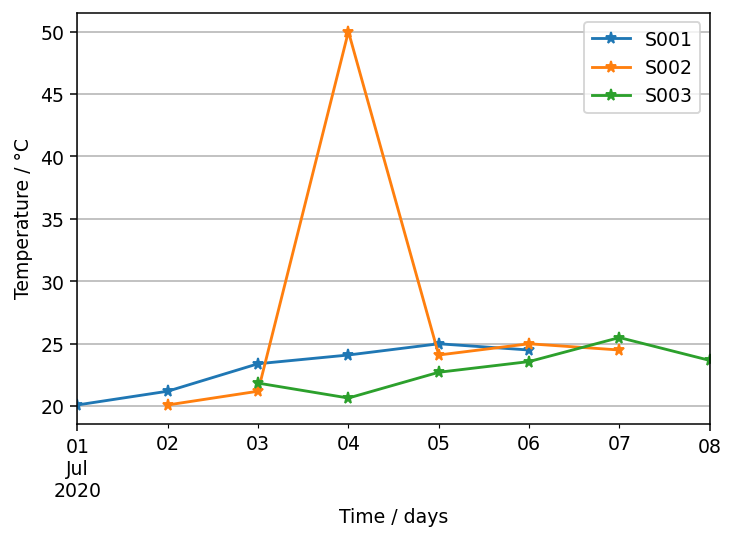

In [33]:
fig1, ax1 = plt.subplots(1,1,dpi = 136, figsize=(6,4))
df.plot(ax = ax1, style="-*")
ax1.set_xlabel("Time / days")
ax1.set_ylabel("Temperature / °C")
ax1.grid(True)
plt.show()

## Relations

In [34]:
temp_df = df
temp_df

,S001,S002,S003
2020-07-01,20.1,NaN,NaN
2020-07-02,21.2,20.1,NaN
2020-07-03,23.4,21.2,21.850047
2020-07-04,24.1,50.0,20.654171
2020-07-05,25.0,24.1,22.717380
2020-07-06,24.5,25.0,23.573947
2020-07-07,NaN,24.5,25.497480
2020-07-08,NaN,NaN,23.666144


In [35]:
st1 = {"ID" : 13670, "name": "Duisburg-Baerl", "lat": 51.5088, "lon": 6.7018}
st1

{'ID': 13670, 'name': 'Duisburg-Baerl', 'lat': 51.5088, 'lon': 6.7018}

CSV File Example with Station Metadata:

```
ID; date_from; date_to; lat; lon; name; state
13670;2008-01-01;2019-12-31;24;51.5088;6.7018;Duisburg-Baerl;Nordrhein-Westfalen
1590;1937-01-01;2019-12-31;37;51.4942;6.2463;Geldern-Walbeck;Nordrhein-Westfalen
2629;1851-01-01;2016-12-31;46;51.7612;6.0954;Kleve;Nordrhein-Westfalen
2494;2001-01-01;2008-12-31;31;51.7329;6.2688;Kalkar;Nordrhein-Westfalen
```

In [36]:
txt = '''ID; date_from; date_to; lat; lon; name; state
13670;2008-01-01;2019-12-31;24;51.5088;6.7018;Duisburg-Baerl;Nordrhein-Westfalen
1590;1937-01-01;2019-12-31;37;51.4942;6.2463;Geldern-Walbeck;Nordrhein-Westfalen
2629;1851-01-01;2016-12-31;46;51.7612;6.0954;Kleve;Nordrhein-Westfalen
2494;2001-01-01;2008-12-31;31;51.7329;6.2688;Kalkar;Nordrhein-Westfalen
'''

In [37]:
f = open("data/stations_short.csv", "w")
f.write(txt)
f.close()